In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import CrossEntropyLoss, Linear, Softmax, Sigmoid, Module
import torch.optim as optim
from scipy.optimize import minimize
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.connectors import TorchConnector
import qiskit
import qiskit_machine_learning
print(qiskit.version.get_version_info())
print(qiskit_machine_learning.version.get_version_info())

1.2.4
0.8.0


In [4]:
# Creating/Formatting Data

In [5]:
# Static State Params List
state_params_list = np.zeros((50, 4, 3))
# Hadamard state (pi/2, 0, pi)
state_params_list[0] = np.array([[np.pi/2, 0, np.pi] for _ in range(4)])
# X state (pi, 0, pi) 
state_params_list[1] = np.array([[np.pi, 0, np.pi] for _ in range(4)])
# Y state (pi, 0, np.pi/2)
state_params_list[2] = np.array([[np.pi, 0, np.pi/2] for _ in range(4)])
# Z state (0, 0, 0)
state_params_list[3] = np.array([[0, 0, 0] for _ in range(4)])
# +Y state (pi, 0, -np.pi/2)
state_params_list[4] = np.array([[np.pi, 0, -np.pi/2] for _ in range(4)])
# T state (pi/4, 0, 0)
state_params_list[5] = np.array([[np.pi/4, 0, 0] for _ in range(4)])
# S state (pi/2, 0, 0)
state_params_list[6] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# Bell state (pi/2, 0, 0) followed by CNOT
state_params_list[7] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# W state preparation angles
state_params_list[8] = np.array([[2*np.arccos(1/np.sqrt(3)), 0, 0] for _ in range(4)])
# GHZ state preparation angles 
state_params_list[9] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# Random state 1 (pi/3, pi/6, pi/4)
state_params_list[10] = np.array([[np.pi/3, np.pi/6, np.pi/4] for _ in range(4)])
# Random state 2 (2*pi/3, pi/4, pi/3) 
state_params_list[11] = np.array([[2*np.pi/3, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 3 (pi/6, pi/3, 2*pi/3)
state_params_list[12] = np.array([[np.pi/6, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 4 (3*pi/4, pi/6, pi/2)
state_params_list[13] = np.array([[3*np.pi/4, np.pi/6, np.pi/2] for _ in range(4)])
# Random state 5 (pi/2, pi/4, pi/3)
state_params_list[14] = np.array([[np.pi/2, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 6 (pi/5, pi/3, 3*pi/4)
state_params_list[15] = np.array([[np.pi/5, np.pi/3, 3*np.pi/4] for _ in range(4)])
# Random state 7 (2*pi/5, pi/2, pi/6)
state_params_list[16] = np.array([[2*np.pi/5, np.pi/2, np.pi/6] for _ in range(4)])
# Random state 8 (3*pi/5, 2*pi/3, pi/4)
state_params_list[17] = np.array([[3*np.pi/5, 2*np.pi/3, np.pi/4] for _ in range(4)])
# Random state 9 (4*pi/5, 3*pi/4, pi/3)
state_params_list[18] = np.array([[4*np.pi/5, 3*np.pi/4, np.pi/3] for _ in range(4)])
# Random state 10 (pi/6, 5*pi/6, pi/2)
state_params_list[19] = np.array([[np.pi/6, 5*np.pi/6, np.pi/2] for _ in range(4)])
# Random state 11 (pi/4, pi/3, 2*pi/3)
state_params_list[20] = np.array([[np.pi/4, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 12 (pi/3, pi/2, 3*pi/4)
state_params_list[21] = np.array([[np.pi/3, np.pi/2, 3*np.pi/4] for _ in range(4)])
# Random state 13 (pi/2, 2*pi/3, 5*pi/6)
state_params_list[22] = np.array([[np.pi/2, 2*np.pi/3, 5*np.pi/6] for _ in range(4)])
# Random state 14 (2*pi/3, 3*pi/4, pi)
state_params_list[23] = np.array([[2*np.pi/3, 3*np.pi/4, np.pi] for _ in range(4)])
# Random state 15 (3*pi/4, 5*pi/6, 7*pi/6)
state_params_list[24] = np.array([[3*np.pi/4, 5*np.pi/6, 7*np.pi/6] for _ in range(4)])
# Random state 16 (5*pi/6, pi, 4*pi/3)
state_params_list[25] = np.array([[5*np.pi/6, np.pi, 4*np.pi/3] for _ in range(4)])
# Random state 17 (pi, 7*pi/6, 3*pi/2)
state_params_list[26] = np.array([[np.pi, 7*np.pi/6, 3*np.pi/2] for _ in range(4)])
# Random state 18 (7*pi/6, 4*pi/3, 5*pi/3)
state_params_list[27] = np.array([[7*np.pi/6, 4*np.pi/3, 5*np.pi/3] for _ in range(4)])
# Random state 19 (4*pi/3, 3*pi/2, 11*pi/6)
state_params_list[28] = np.array([[4*np.pi/3, 3*np.pi/2, 11*np.pi/6] for _ in range(4)])
# Random state 20 (3*pi/2, 5*pi/3, 2*pi)
state_params_list[29] = np.array([[3*np.pi/2, 5*np.pi/3, 2*np.pi] for _ in range(4)])
# Random state 21 (5*pi/3, 11*pi/6, 13*pi/6)
state_params_list[30] = np.array([[5*np.pi/3, 11*np.pi/6, 13*np.pi/6] for _ in range(4)])
# Random state 22 (11*pi/6, 2*pi, 7*pi/3)
state_params_list[31] = np.array([[11*np.pi/6, 2*np.pi, 7*np.pi/3] for _ in range(4)])
# Random state 23 (pi/8, pi/5, pi/3)
state_params_list[32] = np.array([[np.pi/8, np.pi/5, np.pi/3] for _ in range(4)])
# Random state 24 (3*pi/8, 2*pi/5, 2*pi/3)
state_params_list[33] = np.array([[3*np.pi/8, 2*np.pi/5, 2*np.pi/3] for _ in range(4)])
# Random state 25 (5*pi/8, 3*pi/5, pi)
state_params_list[34] = np.array([[5*np.pi/8, 3*np.pi/5, np.pi] for _ in range(4)])
# Random state 26 (7*pi/8, 4*pi/5, 4*pi/3)
state_params_list[35] = np.array([[7*np.pi/8, 4*np.pi/5, 4*np.pi/3] for _ in range(4)])
# Random state 27 (pi/12, pi/7, 3*pi/5)
state_params_list[36] = np.array([[np.pi/12, np.pi/7, 3*np.pi/5] for _ in range(4)])
# Random state 28 (5*pi/12, 2*pi/7, 4*pi/5)
state_params_list[37] = np.array([[5*np.pi/12, 2*np.pi/7, 4*np.pi/5] for _ in range(4)])
# Random state 29 (7*pi/12, 3*pi/7, pi)
state_params_list[38] = np.array([[7*np.pi/12, 3*np.pi/7, np.pi] for _ in range(4)])
# Random state 30 (11*pi/12, 4*pi/7, 6*pi/5)
state_params_list[39] = np.array([[11*np.pi/12, 4*np.pi/7, 6*np.pi/5] for _ in range(4)])
# Random state 31 (pi/10, pi/8, 7*pi/6)
state_params_list[40] = np.array([[np.pi/10, np.pi/8, 7*np.pi/6] for _ in range(4)])
# Random state 32 (3*pi/10, 3*pi/8, 4*pi/3)
state_params_list[41] = np.array([[3*np.pi/10, 3*np.pi/8, 4*np.pi/3] for _ in range(4)])
# Random state 33 (7*pi/10, 5*pi/8, 3*pi/2)
state_params_list[42] = np.array([[7*np.pi/10, 5*np.pi/8, 3*np.pi/2] for _ in range(4)])
# Random state 34 (9*pi/10, 7*pi/8, 5*pi/3)
state_params_list[43] = np.array([[9*np.pi/10, 7*np.pi/8, 5*np.pi/3] for _ in range(4)])
# Random state 35 (11*pi/10, 9*pi/8, 11*pi/6)
state_params_list[44] = np.array([[11*np.pi/10, 9*np.pi/8, 11*np.pi/6] for _ in range(4)])
# Random state 36 (13*pi/10, 11*pi/8, 2*pi)
state_params_list[45] = np.array([[13*np.pi/10, 11*np.pi/8, 2*np.pi] for _ in range(4)])
# Random state 37 (3*pi/20, 13*pi/8, 7*pi/4)
state_params_list[46] = np.array([[3*np.pi/20, 13*np.pi/8, 7*np.pi/4] for _ in range(4)])
# Random state 38 (7*pi/20, 15*pi/8, 5*pi/4)
state_params_list[47] = np.array([[7*np.pi/20, 15*np.pi/8, 5*np.pi/4] for _ in range(4)])
# Random state 39 (11*pi/20, pi/9, 3*pi/4)
state_params_list[48] = np.array([[11*np.pi/20, np.pi/9, 3*np.pi/4] for _ in range(4)])
# Random state 40 (19*pi/20, 2*pi/9, pi/4)
state_params_list[49] = np.array([[19*np.pi/20, 2*np.pi/9, np.pi/4] for _ in range(4)])

print(state_params_list)

[[[ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]]

 [[ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]]

 [[ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]]

 [[ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]]

 [[ 1.57079633  0.          

In [6]:
# Loading Variable Weights
import json
def load_four_class_data():
    # Depth files
    location = "/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/NTangled_Datasets-main/NTangled_Datasets-main/Hardware_Efficient/4_Qubits"
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    # Load and process all weights
    for i in range(0,1):
        if i == 0:
            with open(location + f"/Depth_{1}/hwe_4q_ps_5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
        else:
            with open(location + f"/Depth_{1}/hwe_4q_ps_{i}5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_{i}5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_{i}5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_{i}5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
    
    # Combine all data and pad to max size (4,4,3)
    max_size = (4,4,3)
    padded_data = []
    
    for data in data1 + data2 + data3 + data4:
        # Convert data to numpy array if not already
        data_arr = np.array(data)
        # Pad with zeros if needed
        if data_arr.shape != max_size:
            pad_width = [(0, max_size[i] - data_arr.shape[i]) for i in range(len(max_size))]
            data_arr = np.pad(data_arr, pad_width, mode='constant')
        padded_data.append(data_arr)
    
    x = np.array(padded_data)
    
    # Create labels
    y = np.concatenate([
        np.ones(len(data1), dtype=int),
        np.ones(len(data2), dtype=int) * 2,
        np.ones(len(data3), dtype=int) * 3,
        np.ones(len(data4), dtype=int) * 4
    ])
    
    print(x)
    print(x.shape)
    print(y)
    
    return x, y

In [7]:
wx, wy = load_four_class_data()
print(wx.shape,wy.shape)

[[[[-0.0380492   0.02183672  0.03220569]
   [-0.04109688  0.04458482 -0.01448415]
   [ 0.04275408 -0.04544197 -0.02364965]
   [-0.04332199 -0.04773934 -0.01598744]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]]


 [[[ 0.05170398  0.01168392 -0.06009462]
   [ 0.243309    0.45104221  0.47327134]
   [-0.24505161 -0.41597199 -0.27864618]
   [-0.22578102 -0.15001654 -0.08258253]]

  [[ 0.12208327 -0.04903425  0.02521982]
   [ 0.11338364  0.49720278  0.46037073]
   [-0.23163257 -0.28240836 -0.63127422]
   [-0.21903206 -0.00662576 -0.13605921]]

  

In [8]:
# Conditioning Data
x =[]
y = []

for g in range(len(wx)):
    for il in range(len(state_params_list)):
        x.append(np.concatenate([state_params_list[il].flatten(),state_params_list[il].flatten(), wx[g].flatten(), wx[g].flatten()]))
        y.append(wy[g])

xa = np.array(x)
ya = np.array(y)

# Shuffle
indices = np.random.permutation(len(xa))
xa = xa[indices]
ya = ya[indices]

# Reduce labels by 1 (shifting from 1-4 range to 0-3 range)
ya = ya - 1

# Split into train and test sets (80-20 split)
split_idx = int(0.8 * len(x))
x = xa[:split_idx]
y = ya[:split_idx]
x1 = xa[split_idx:]
y1 = ya[split_idx:]

In [9]:
print(x[0])
print(y[0])

print(x[1])
print(y[1])

[ 4.08407045  4.3196899   6.28318531  4.08407045  4.3196899   6.28318531
  4.08407045  4.3196899   6.28318531  4.08407045  4.3196899   6.28318531
  4.08407045  4.3196899   6.28318531  4.08407045  4.3196899   6.28318531
  4.08407045  4.3196899   6.28318531  4.08407045  4.3196899   6.28318531
  0.12944253 -0.18127134  0.08223521 -1.16508768  1.37143139 -0.38919027
  0.27500722  2.15426568  0.10922231 -0.6675254  -0.07161475 -0.30087708
 -0.43315336 -0.11780902  0.12194381  1.40713329 -2.12455664  0.44249045
  0.04356493 -0.62054406 -0.15913467 -0.99625868  0.34729132  0.45981455
  0.31962774  0.0222279  -0.26242537 -1.16954471  1.37262343  0.41325076
  0.03103405 -1.54569719 -1.87674751 -0.61896585  0.01346115 -0.0163207
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.12944253 -0.18127134  0.08223521 -1.16508768  1.37143139 -0.38919027
  0.27500722  2.15426568  0.10922231 -0.6675254  -0.07161475 -0.3008

In [10]:
print(x,y,x1,y1)
print(x.shape,y.shape,x1.shape,y1.shape)

[[4.08407045 4.3196899  6.28318531 ... 0.         0.         0.        ]
 [1.30899694 0.8975979  2.51327412 ... 0.         0.         0.        ]
 [2.35619449 2.61799388 3.66519143 ... 0.         0.         0.        ]
 ...
 [5.75958653 6.28318531 7.33038286 ... 0.         0.         0.        ]
 [2.19911486 1.96349541 4.71238898 ... 0.         0.         0.        ]
 [1.57079633 0.         0.         ... 0.         0.         0.        ]] [2 1 1 1 0 2 1 3 2 0 0 0 0 3 0 0 1 1 2 1 0 2 0 1 2 0 3 2 3 0 2 0 0 1 1 2 1
 1 2 3 2 3 2 3 3 3 1 0 0 0 3 2 1 1 2 0 3 1 3 1 3 2 2 0 3 2 3 2 0 2 0 0 3 1
 3 3 0 1 2 3 2 0 1 2 2 1 2 1 3 3 0 0 0 3 0 3 0 1 2 3 0 2 1 0 3 1 2 1 2 1 0
 2 3 0 2 2 1 0 0 2 1 1 2 1 3 0 1 1 0 3 0 1 1 3 3 0 3 1 3 2 3 1 3 1 0 1 0 1
 2 0 2 3 2 3 3 1 3 2 2 1] [[ 1.57079633e+00  2.09439510e+00  2.61799388e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.88495559e+00  2.09439510e+00  7.85398163e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.18879020e+00  4

In [11]:
# Creating Circuit

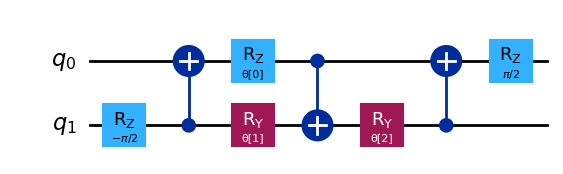

In [12]:
# Two qubit unitary as defined
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

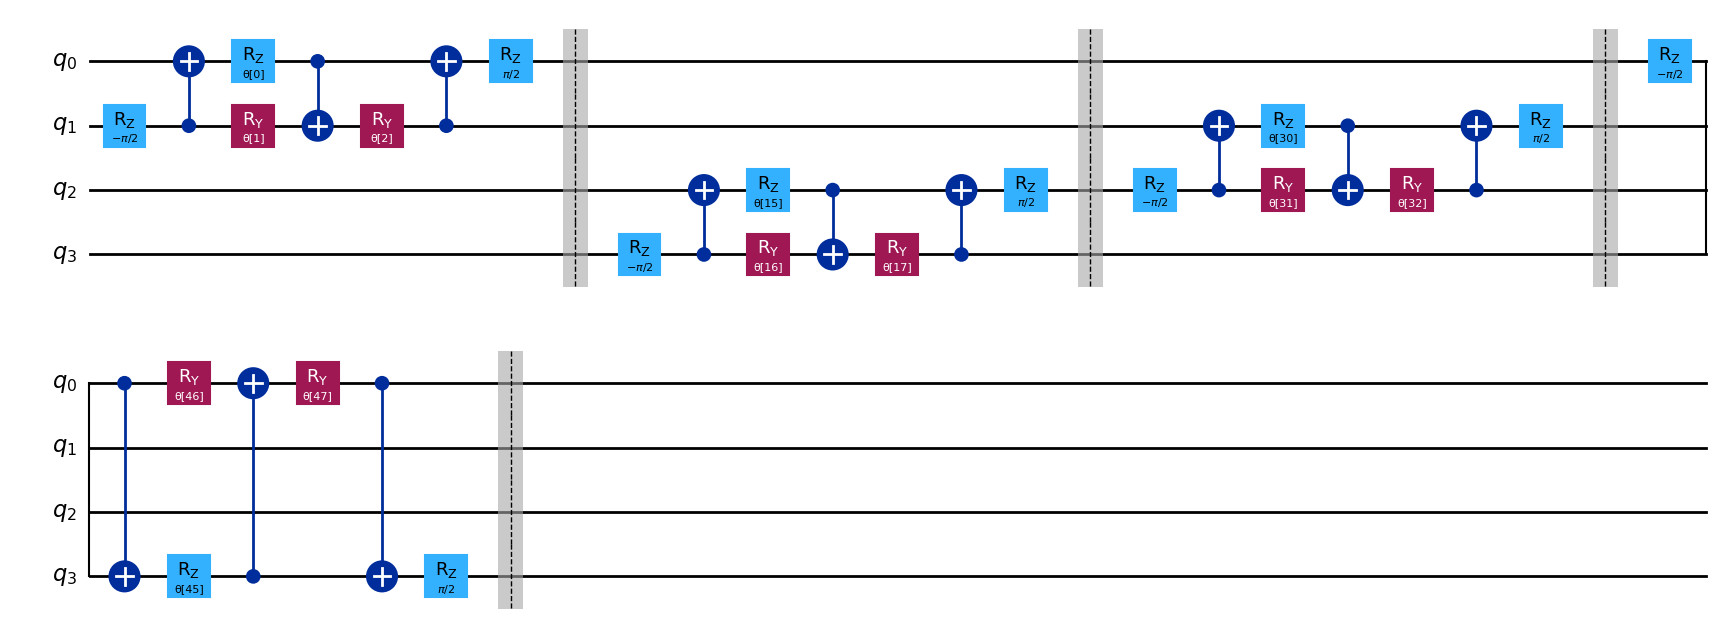

In [13]:
# Create Layer (Repeating Circuit on Neighboring Qubits).
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 15)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc

# Visual
circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

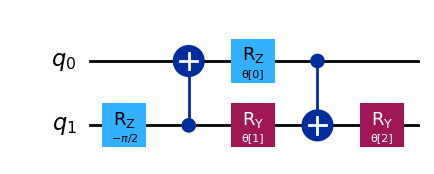

In [14]:
# Defining Pool Circuit
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

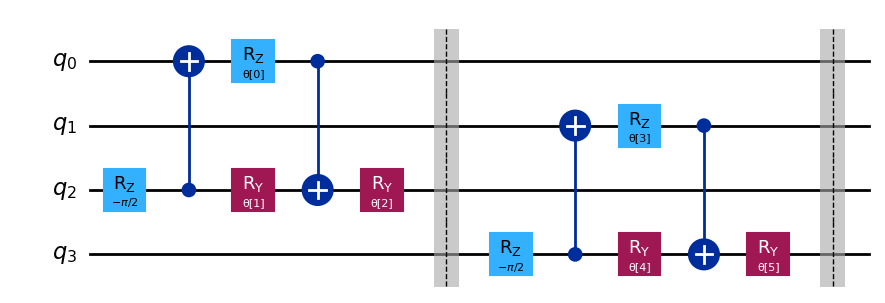

In [15]:
# Defining Pool Layer (Repeating Circuit on Neighboring Qubits)
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc

# Visual
sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

In [16]:
def generate_feature_map(num_qubits=8, depth=4, weight=None, state_params=None):

    print("depth:", depth)
    def create_feature_map(num_qubits, depth, weight):
        """
        Creates a Hardware Efficient Ansatz feature map following Algorithm 2
        Args:
            num_qubits (int): Number of qubits (8 for this case)
            depth (int): Circuit depth L
        Returns:
            QuantumCircuit: Feature map circuit
        """
        # Initialize circuit
        feature_map = QuantumCircuit(num_qubits, name="Feature Map")
        
        if (weight is None):
            # Generate random rotation parameters for U3 gates
            # Shape: (depth, num_qubits, 3) for the three rotation angles
            theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
        else:
            theta = weight[:depth]
            theta = np.concatenate([theta, theta], axis=1)

        # Implement the hardware efficient ansatz
        for d in range(depth):
            # First rotation layer - U3 gates on each qubit
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # First entangling layer - CZ gates on even-odd pairs
            for i in range(0, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # feature_map.barrier()
            
            # Second rotation layer - U3 gates on each qubit    
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # Second entangling layer - CZ gates offset by 1
            for i in range(1, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # Connect last qubit to first for circular entanglement
            # if int(num_qubits/2) % 2 == 0:
            #     feature_map.cz(int(num_qubits)-1, 0)
            feature_map.barrier()
        
        return feature_map

    def generate_input_maps(state_params,num_qubits):
        """
        Generates random input states by applying random U3 rotations
        Args:
            num_states (int): Number of input states to generate
            num_qubits (int): Number of qubits in circuit
        Returns:
            list[QuantumCircuit]: List of input state circuits
        """

        if (state_params is None):
            # Generate random angles for each qubit
            # We'll copy the state for qubits 0-3 to qubits 4-7
            state_params = np.random.uniform(0, 2*np.pi, size=(4, 3))

        input_states = []
        for _ in range(state_params.shape[0]):
            
            # Create input state circuit
            input_circuit = QuantumCircuit(num_qubits)
            
            # Apply rotations to first 4 qubits
            for i in range(4):
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i)
                # Copy same rotations to corresponding qubit in second half
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i+4)
                
            input_circuit.barrier()
            
            input_states.append(input_circuit)
        
        return input_states

    # Create and visualize the feature map
    initial_feature_map = create_feature_map(num_qubits, depth, weight)
    print("Feature Map Circuit:")
    display(initial_feature_map.draw("mpl"))

    # Generate and visualize sample input states
    input_states = generate_input_maps(state_params,num_qubits)
    print("\nExample Input State Circuit:")
    display(input_states[0].draw("mpl"))

    # Combine feature map with an input state to see complete circuit
    complete_circuit = input_states[0].compose(initial_feature_map)
    print("\nComplete Circuit (Input + Feature Map):")
    display(complete_circuit.draw("mpl"))

    return complete_circuit

depth: 2
Feature Map Circuit:


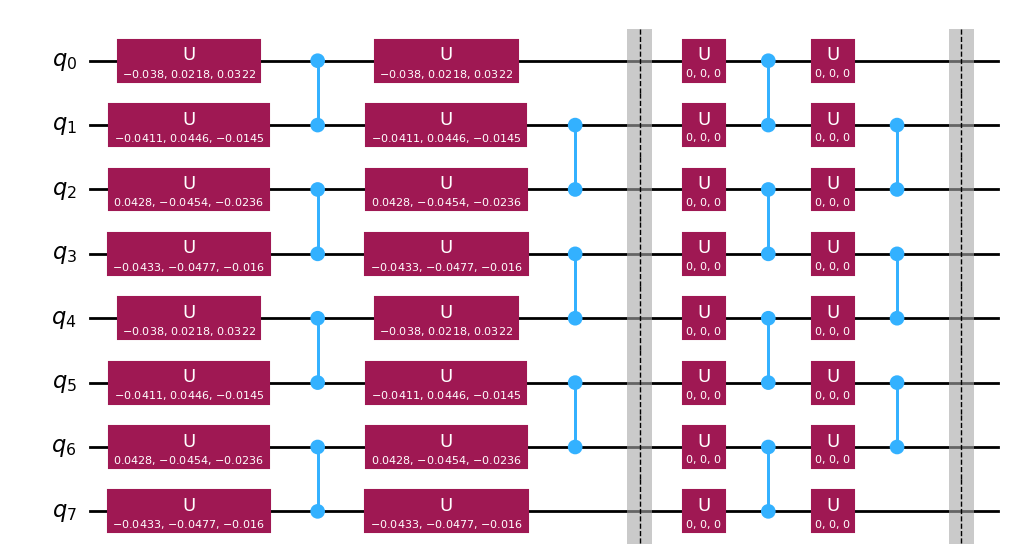


Example Input State Circuit:


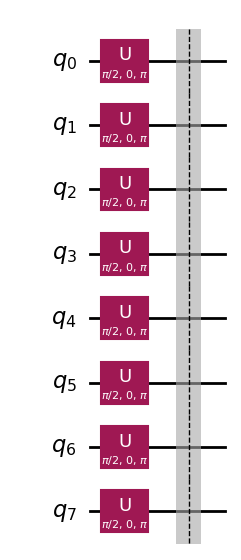


Complete Circuit (Input + Feature Map):


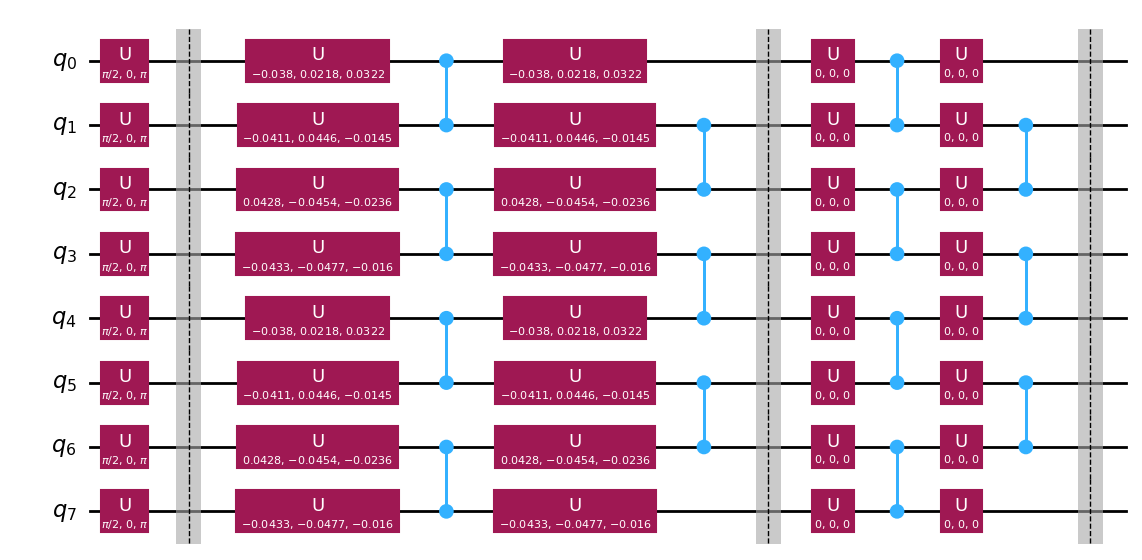

In [17]:
# Sample Generation
circuit.feature_map = generate_feature_map(num_qubits=8, depth=y[0], weight=wx[0], state_params=state_params_list[0])

In [18]:
def generate_feature_map(num_qubits=8, weight=None, depth = 4):
    params = ParameterVector("θ", (num_qubits*3)+(num_qubits*3*4))
    
    state_params = params[:num_qubits*3]
    weight = params[num_qubits*3:]
    
    """
    Creates a Hardware Efficient Ansatz feature map following Algorithm 2 (Combined with Input State)
    Args:
        num_qubits (int): Number of qubits (8 for this case)
        depth (int): Circuit depth L
    Returns:
        QuantumCircuit: Feature map circuit
    """
    # Initialize circuit
    feature_map = QuantumCircuit(num_qubits, name="Feature Map")
    
    if (state_params is None):
        # Generate random angles for each qubit
        # We'll copy the state for qubits 0-3 to qubits 4-7
        state_params = np.random.uniform(0, 2*np.pi, size=(8, 3))
    else:
        # Reshape state parameters into required shape
        state_params = np.array(state_params).reshape(8, 3)
        
        # Apply rotations to first 4 qubits
        for i in range(8):
            feature_map.u(state_params[i,0], 
                        state_params[i,1], 
                        state_params[i,2], i)
            
        feature_map.barrier()
        

    if (weight is None):
        # Generate random rotation parameters for U3 gates
        # Shape: (depth, num_qubits, 3) for the three rotation angles
        theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
    else:
        # Reshape weight parameters into required shape
        theta = np.array(weight).reshape(depth, num_qubits, 3)

    # Implement the hardware efficient ansatz
    
    for d in range(depth):
        # First rotation layer - U3 gates on each qubit
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # First entangling layer - CZ gates on even-odd pairs
        for i in range(0, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # feature_map.barrier()
        
        # Second rotation layer - U3 gates on each qubit    
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # Second entangling layer - CZ gates offset by 1
        for i in range(1, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # Connect last qubit to first for circular entanglement
        # if int(num_qubits/2) % 2 == 0:
        #     feature_map.cz(int(num_qubits)-1, 0)
        feature_map.barrier()

    return feature_map

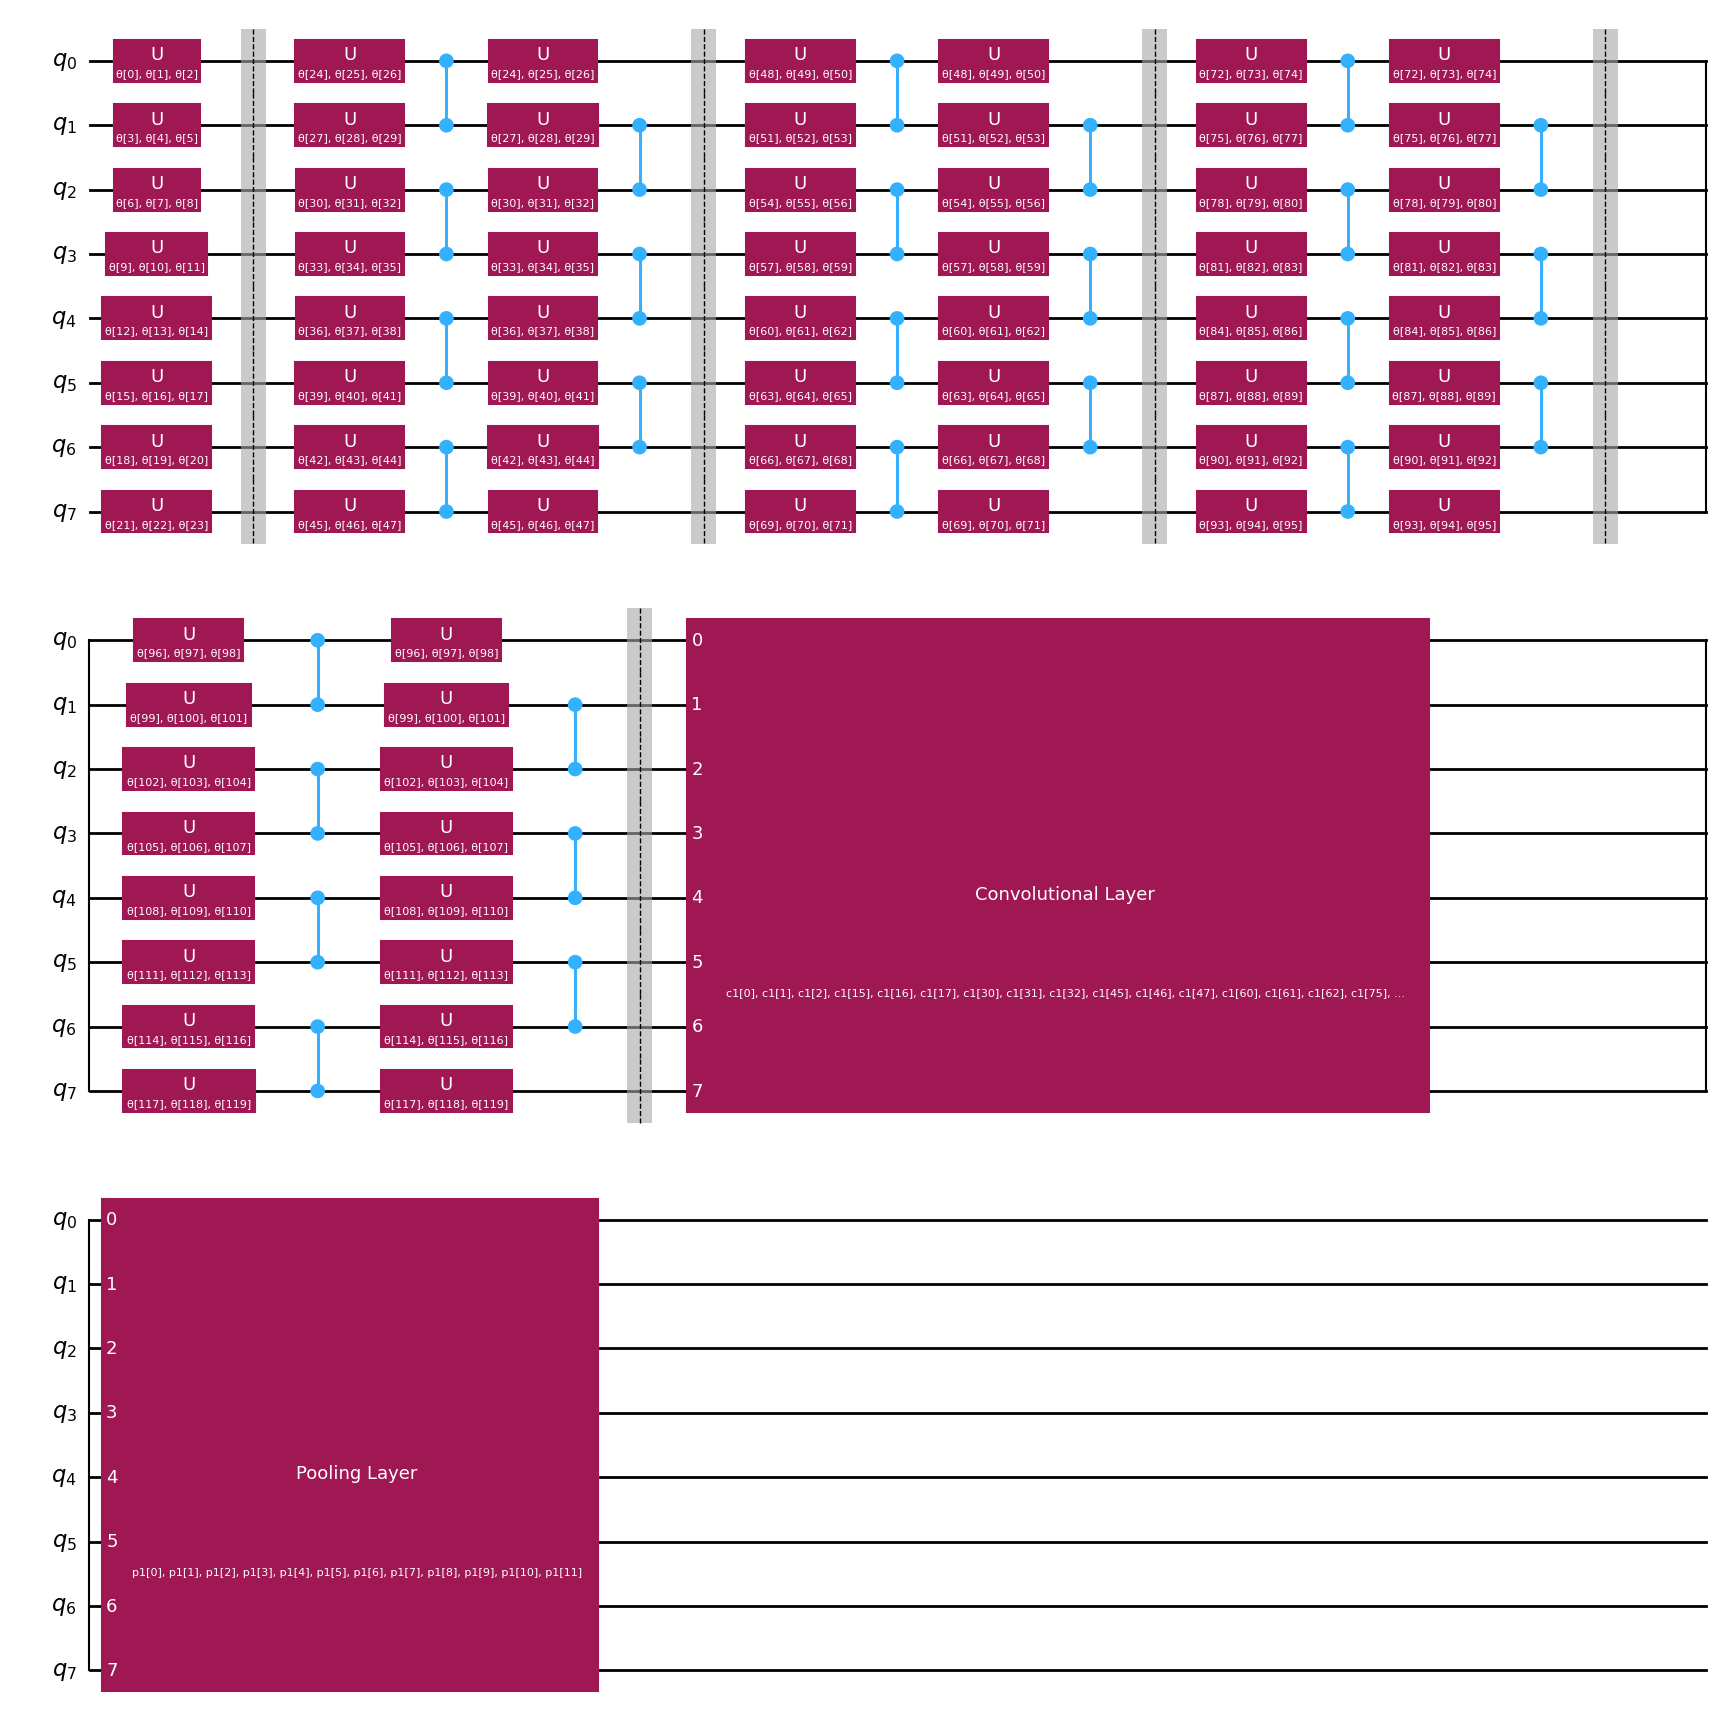

In [19]:
# Ansatz Instantiation Method
from qiskit import ClassicalRegister, QuantumRegister
def create_QCNN():
    q_reg = QuantumRegister(8, "q_reg")
    ansatz = QuantumCircuit(q_reg, name="Ansatz")

    # First Convolutional Layer
    ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

    # First Pooling Layer
    ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

    # # Second Convolutional Layer
    # ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

    # # Second Pooling Layer
    # ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

    # # Third Convolutional Layer
    # ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

    # Combining the feature map and ansatz
    circuit = QNNCircuit(8)
    circuit.feature_map = generate_feature_map(num_qubits=8)
    circuit.ansatz = ansatz
    return circuit

# Visual
display(create_QCNN().draw("mpl"))

In [20]:
# Tensor for Pytorch
x=x[:256]
x1=x1[:256]
y=y[:256]
y1=y1[:256]
X = torch.tensor(x, dtype=torch.float32).to("cuda")
Y = torch.tensor(y, dtype=torch.long).to("cuda")
X1 = torch.tensor(x1, dtype=torch.float32).to("cuda")
Y1 = torch.tensor(y1, dtype=torch.long).to("cuda")

In [21]:
# One-Hot Encoding for Final Processing
num_classes = 4
Y = (torch.nn.functional.one_hot(Y, num_classes=num_classes).float())
Y1 = (torch.nn.functional.one_hot(Y1, num_classes=num_classes).float())

In [22]:
print(X,Y,X1,Y1)

tensor([[4.0841, 4.3197, 6.2832,  ..., 0.0000, 0.0000, 0.0000],
        [1.3090, 0.8976, 2.5133,  ..., 0.0000, 0.0000, 0.0000],
        [2.3562, 2.6180, 3.6652,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [5.7596, 6.2832, 7.3304,  ..., 0.0000, 0.0000, 0.0000],
        [2.1991, 1.9635, 4.7124,  ..., 0.0000, 0.0000, 0.0000],
        [1.5708, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0') tensor([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
      

In [23]:
# Training

In [24]:
# Pytorch Circuit Module
import torch.nn as nn
class Model(Module): # Simplified
    def __init__(self, qnn_module):
        super().__init__()
        self.qnn_module = qnn_module

    def forward(self, x):
        x = self.qnn_module(x)
        return x

In [25]:
from qiskit_aer.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_algorithms.gradients import ReverseEstimatorGradient

# Reproducable seeds
num_qubits = 8
algorithm_globals.random_seed = 65
seed = 90

# Creating GPU compatible Estimator primitive
sampler = Estimator()
sampler.set_options(device='GPU')
sampler.set_options(method="statevector")
sampler.set_options(seed = seed)

# Setting observables on 15th and 16th qubits.
observable_z5 = SparsePauliOp.from_sparse_list([("Z", [4], 1)], num_qubits=num_qubits)
observable_z6 = SparsePauliOp.from_sparse_list([("Z", [5], 1)], num_qubits=num_qubits)
observable_z7 = SparsePauliOp.from_sparse_list([("Z", [6], 1)], num_qubits=num_qubits)
observable_z8 = SparsePauliOp.from_sparse_list([("Z", [7], 1)], num_qubits=num_qubits)
observables = [observable_z5, observable_z6, observable_z7, observable_z8]

# Instantiating underlying EstimatorQNN
estimator = EstimatorQNN(
    estimator = sampler,
    circuit = create_QCNN(),
    observables = observables,
    gradient = ReverseEstimatorGradient(sampler),
    input_gradients = True,
)

# Initial Forward Weights
weights = algorithm_globals.random.random(estimator.num_weights)

# Checking Data Forward Result
estimator.forward(input_data = x1[:30], weights = weights)

/tmp/ipykernel_13420/4029457300.py:25: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  estimator = EstimatorQNN(
/tmp/ipykernel_13420/4029457300.py:25: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (8). If `circuit` is transpiled, this may cause unstable behaviour.
  estimator = EstimatorQNN(


array([[-0.05859375,  0.109375  , -0.28710938,  0.25976562],
       [-0.12109375, -0.03320312, -0.18554688,  0.28320312],
       [ 0.1015625 , -0.22070312, -0.05078125,  0.22460938],
       [ 0.47851562, -0.23828125, -0.16796875,  0.48828125],
       [-0.08203125,  0.37109375,  0.25976562, -0.390625  ],
       [ 0.02539062, -0.109375  , -0.03125   ,  0.18945312],
       [ 0.1875    , -0.02734375,  0.0234375 , -0.19921875],
       [ 0.03710938,  0.12890625, -0.13476562,  0.3203125 ],
       [ 0.66992188, -0.08789062,  0.15234375,  0.21875   ],
       [-0.56054688,  0.1015625 ,  0.28710938, -0.45507812],
       [ 0.23828125, -0.12695312, -0.13671875,  0.26757812],
       [ 0.3359375 ,  0.02929688, -0.1875    ,  0.21484375],
       [ 0.00585938,  0.01757812,  0.2109375 , -0.0390625 ],
       [-0.05078125,  0.15234375, -0.08984375,  0.1875    ],
       [ 0.00390625, -0.04296875,  0.05664062, -0.15039062],
       [ 0.02929688,  0.00976562, -0.28125   ,  0.3984375 ],
       [ 0.11914062,  0.

In [26]:
# Wrapping estimator with initial weights under TorchConnecter, itself under Pytorch Module.
model = Model(TorchConnector(estimator, weights))
model.to("cuda")
next(model.parameters()).is_cuda

True

In [27]:
def accuracy(output, y):
    preds = torch.argmax(output, dim=1)
    true = torch.argmax(y, dim=1)
    correct = (preds == true).sum().item()
    return (correct / y.size(0)) * 100

In [28]:
def train(model, X, Y, loss_function, optimizer, epochs, loss_list = [], acc_list = [], test_acc_list=[], i = 0):
    optimizer = optim.Adam(model.parameters(), lr=0.1)
    if i == 0:
        output = model(X)
        output0 = model(X1)
        epoch_loss = loss_function(output, Y).item()
        epoch_acc = accuracy(output, Y)
        epoch_test_acc = accuracy(output0, Y1)
        loss_list.append(epoch_loss)
        acc_list.append(epoch_acc)
        test_acc_list.append(epoch_test_acc)
        print(f"Epoch: {i}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, Test Accuracy: {epoch_test_acc:.2f}%")
    else:
        for e in range(i+1): # Considering 0th epoch in list as well
            print(f"Epoch: {e}, Loss: {loss_list[e]:.4f}, Accuracy: {acc_list[e]:.2f}%, Test Accuracy: {test_acc_list[e]:.2f}%")   
        
    for epoch in range(epochs):
        # Forward pass
        output = model(X)
        loss = loss_function(output, Y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate loss and accuracy for the entire epoch (optional, for monitoring)
        with torch.no_grad():
            output = model(X)
            output0 = model(X1)
            epoch_loss = loss_function(output, Y).item()
            epoch_acc = accuracy(output, Y)
            epoch_test_acc = accuracy(output0, Y1)
            loss_list.append(epoch_loss)
            acc_list.append(epoch_acc)
            test_acc_list.append(epoch_test_acc)
            print(f"Epoch: {epoch+1+i}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, Test Accuracy: {epoch_test_acc:.2f}%")
    return loss_list, acc_list, test_acc_list

In [29]:
optimizer = optim.Adam(model.parameters(), lr=0.1)
loss_function = CrossEntropyLoss()

In [47]:
# Train the Model
loss_list, acc_list, test_acc_list = train(model = model, X = X, Y = Y, optimizer = optimizer, loss_function = loss_function, epochs = 45, loss_list = loss_list, acc_list = acc_list, test_acc_list=test_acc_list, i = 50)

Epoch: 0, Loss: 1.4262, Accuracy: 26.25%, Test Accuracy: 25.00%
Epoch: 1, Loss: 1.3896, Accuracy: 30.63%, Test Accuracy: 17.50%
Epoch: 2, Loss: 1.3651, Accuracy: 33.12%, Test Accuracy: 27.50%
Epoch: 3, Loss: 1.3581, Accuracy: 33.12%, Test Accuracy: 32.50%
Epoch: 4, Loss: 1.3531, Accuracy: 33.75%, Test Accuracy: 30.00%
Epoch: 5, Loss: 1.3448, Accuracy: 37.50%, Test Accuracy: 30.00%
Epoch: 6, Loss: 1.3415, Accuracy: 38.75%, Test Accuracy: 37.50%
Epoch: 7, Loss: 1.3366, Accuracy: 38.12%, Test Accuracy: 37.50%
Epoch: 8, Loss: 1.3341, Accuracy: 38.12%, Test Accuracy: 35.00%
Epoch: 9, Loss: 1.3292, Accuracy: 39.38%, Test Accuracy: 30.00%
Epoch: 10, Loss: 1.3277, Accuracy: 40.62%, Test Accuracy: 32.50%
Epoch: 11, Loss: 1.3253, Accuracy: 46.25%, Test Accuracy: 52.50%
Epoch: 12, Loss: 1.3223, Accuracy: 47.50%, Test Accuracy: 62.50%
Epoch: 13, Loss: 1.3176, Accuracy: 49.38%, Test Accuracy: 60.00%
Epoch: 14, Loss: 1.3172, Accuracy: 49.38%, Test Accuracy: 57.50%
Epoch: 15, Loss: 1.3155, Accuracy: 

/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 51, Loss: 1.2674, Accuracy: 55.62%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 52, Loss: 1.2627, Accuracy: 55.00%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 53, Loss: 1.2620, Accuracy: 58.13%, Test Accuracy: 57.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 54, Loss: 1.2598, Accuracy: 59.38%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 55, Loss: 1.2583, Accuracy: 60.62%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 56, Loss: 1.2607, Accuracy: 56.88%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 57, Loss: 1.2614, Accuracy: 56.25%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 58, Loss: 1.2622, Accuracy: 56.25%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 59, Loss: 1.2620, Accuracy: 55.00%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 60, Loss: 1.2631, Accuracy: 56.25%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 61, Loss: 1.2624, Accuracy: 57.50%, Test Accuracy: 47.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 62, Loss: 1.2610, Accuracy: 58.13%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 63, Loss: 1.2607, Accuracy: 55.62%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 64, Loss: 1.2602, Accuracy: 58.13%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 65, Loss: 1.2603, Accuracy: 58.75%, Test Accuracy: 47.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 66, Loss: 1.2609, Accuracy: 56.25%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 67, Loss: 1.2602, Accuracy: 56.25%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 68, Loss: 1.2600, Accuracy: 55.62%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 69, Loss: 1.2595, Accuracy: 56.25%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 70, Loss: 1.2601, Accuracy: 57.50%, Test Accuracy: 45.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 71, Loss: 1.2602, Accuracy: 56.25%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 72, Loss: 1.2600, Accuracy: 57.50%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 73, Loss: 1.2595, Accuracy: 56.25%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 74, Loss: 1.2593, Accuracy: 56.25%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 75, Loss: 1.2597, Accuracy: 56.25%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 76, Loss: 1.2588, Accuracy: 57.50%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 77, Loss: 1.2578, Accuracy: 56.88%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 78, Loss: 1.2576, Accuracy: 58.13%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 79, Loss: 1.2577, Accuracy: 58.13%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 80, Loss: 1.2570, Accuracy: 58.13%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 81, Loss: 1.2569, Accuracy: 54.37%, Test Accuracy: 47.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 82, Loss: 1.2560, Accuracy: 55.62%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 83, Loss: 1.2560, Accuracy: 53.75%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 84, Loss: 1.2545, Accuracy: 56.25%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 85, Loss: 1.2543, Accuracy: 55.62%, Test Accuracy: 57.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 86, Loss: 1.2549, Accuracy: 56.88%, Test Accuracy: 57.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 87, Loss: 1.2542, Accuracy: 56.25%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 88, Loss: 1.2528, Accuracy: 55.62%, Test Accuracy: 55.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 89, Loss: 1.2510, Accuracy: 56.25%, Test Accuracy: 57.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 90, Loss: 1.2500, Accuracy: 57.50%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 91, Loss: 1.2502, Accuracy: 58.13%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 92, Loss: 1.2499, Accuracy: 55.00%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 93, Loss: 1.2488, Accuracy: 53.12%, Test Accuracy: 50.00%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 94, Loss: 1.2480, Accuracy: 52.50%, Test Accuracy: 52.50%


/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/.venv/lib/python3.12/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:258: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Epoch: 95, Loss: 1.2475, Accuracy: 51.25%, Test Accuracy: 52.50%


In [48]:
print(loss_list, acc_list, test_acc_list)

[1.4261854887008667, 1.3895758390426636, 1.3651169538497925, 1.3581136465072632, 1.3531287908554077, 1.344807505607605, 1.3415359258651733, 1.3365671634674072, 1.3340896368026733, 1.3292356729507446, 1.3277238607406616, 1.325326919555664, 1.3222846984863281, 1.3176432847976685, 1.3171621561050415, 1.31552255153656, 1.3149588108062744, 1.3133559226989746, 1.3139702081680298, 1.313411831855774, 1.3105413913726807, 1.3097975254058838, 1.3021172285079956, 1.2989704608917236, 1.2968640327453613, 1.291424036026001, 1.2870374917984009, 1.2836127281188965, 1.2805184125900269, 1.2771258354187012, 1.2759490013122559, 1.2759920358657837, 1.275291085243225, 1.2743563652038574, 1.27301025390625, 1.2725285291671753, 1.27141273021698, 1.2721140384674072, 1.270267367362976, 1.2702114582061768, 1.26880943775177, 1.2663843631744385, 1.2647249698638916, 1.2640408277511597, 1.2635804414749146, 1.262977123260498, 1.2638548612594604, 1.2649341821670532, 1.2653210163116455, 1.264094352722168, 1.2642049789428

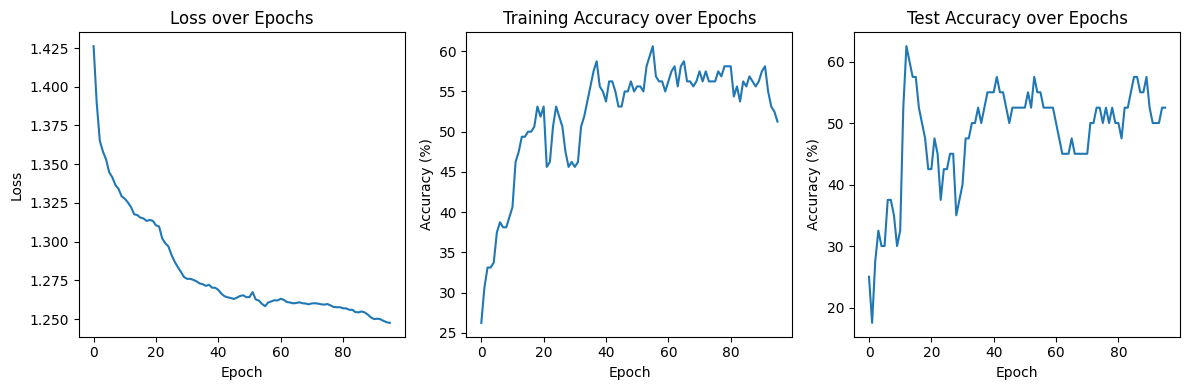

In [49]:
# Plot Loss and Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(loss_list)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 3, 2)
plt.plot(acc_list)
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.subplot(1, 3, 3)
plt.plot(test_acc_list)
plt.title("Test Accuracy over Epochs") 
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()

In [50]:
savemodel = {'model': model, 'optimizer': optimizer.state_dict()}
print(next(model.parameters()).is_cuda)
torch.save(savemodel, "4Qubits(One_Hot)EnhancedCirc_ADAM_256_95Epoch")
print(next(model.parameters()).is_cuda)

True
True


In [51]:
evalmodel = torch.load("4Qubits(One_Hot)EnhancedCirc_ADAM_256_95Epoch", weights_only=False)['model'].to("cuda")
evalmodel.eval()
output0 = evalmodel(X)
output1 = evalmodel(X1)
print(f"Train Accuracy: {accuracy(output0, Y)}%")
print(f"Test Accuracy: {accuracy(output1, Y1)}%")

Train Accuracy: 51.24999999999999%
Test Accuracy: 52.5%


In [52]:
def translate(array):
    arr = []
    for e in array:
        arr.append(torch.argmax(e))
    return arr
print(f"output 0: {translate(output0)}, \n Y:       {translate(Y)}, \n output 1: {translate(output1)}, \n Y1:       {translate(Y1)}")

output 0: [tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(2,

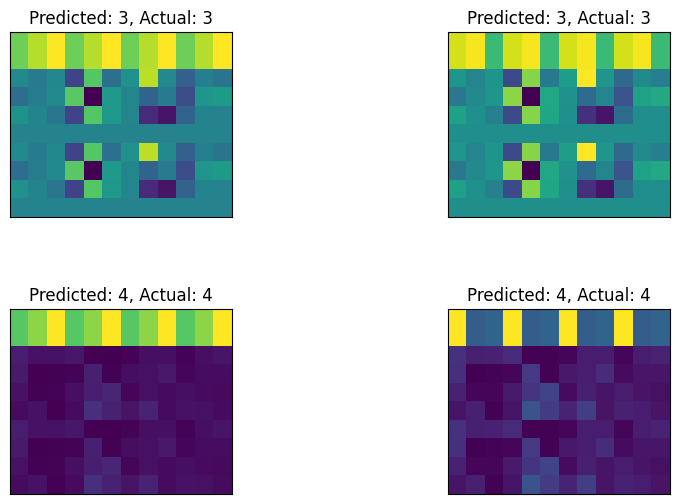

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for ix in range(0, 4):
    depth = X1.detach().cpu().numpy()[ix]
    predicted = torch.argmax(output1[ix]).item() + 1  # Add 1 to get range 1-4
    actual = torch.argmax(Y1[ix]).item() + 1  # Add 1 to get range 1-4
    
    # Reshape depth array into a 2D image
    depth_img = depth.reshape(int(np.sqrt(len(depth))), -1)
    
    # Display as image instead of line plot
    im = ax[ix // 2, ix % 2].imshow(depth_img, cmap='viridis')
    ax[ix // 2, ix % 2].set_title(f"Predicted: {predicted}, Actual: {actual}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

NameError: name 'x_test' is not defined

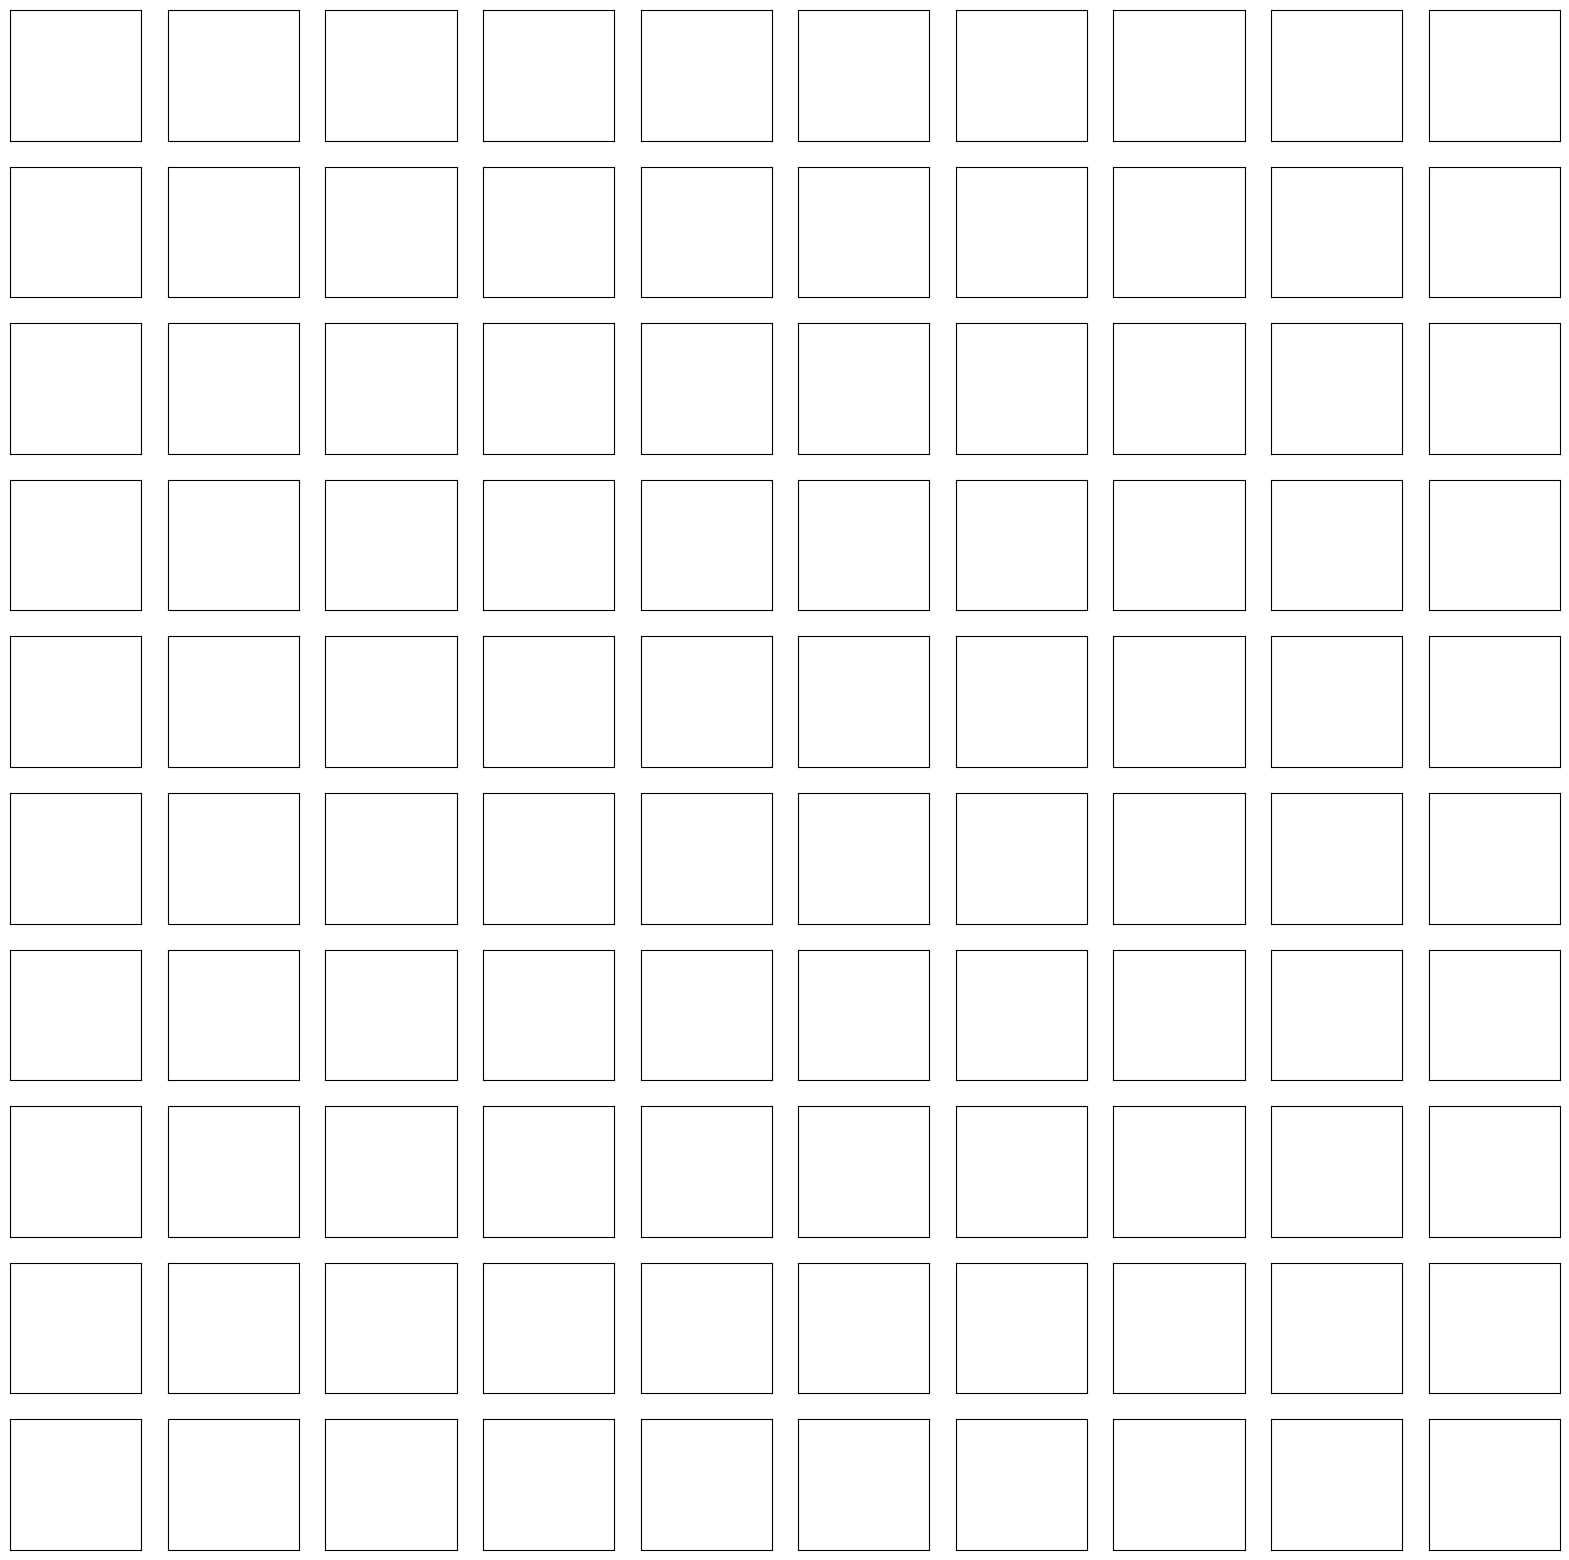

In [54]:
num_rows = 10
num_cols = 10
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 20),
                       subplot_kw={"xticks": [], "yticks": []})

for i in range(num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    
    if i < len(x_test) and i < len(output1):
      ax[row, col].imshow(x_test[i].reshape(28, 28), aspect="equal")

      if torch.argmax(output1[i]) == 0:
          ax[row, col].set_title("QCNN: 3")
      elif torch.argmax(output1[i]) == 1:
          ax[row, col].set_title("QCNN: 4")
      elif torch.argmax(output1[i]) == 2:
          ax[row, col].set_title("QCNN: 5")
      elif torch.argmax(output1[i]) == 3:
          ax[row, col].set_title("QCNN: 6")
    else:
        ax[row, col].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()